<a href="https://colab.research.google.com/github/nirajlondhe8/aiml/blob/main/linearReg/LinearRegression_twoMinima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set a random seed for reproducibility
np.random.seed(42)

# Sample size
n_samples = 100

# Generate synthetic data
latency = np.random.normal(50, 10, n_samples)  # Latency in milliseconds
packet_loss = np.random.uniform(0, 1, n_samples)  # Packet loss as a percentage
throughput = np.random.normal(1000, 250, n_samples)  # Throughput in Mbps

# Generate a synthetic target variable (Network Performance Score)
# We use a simple linear relationship with some noise
performance_score = 0.5 * latency - 10 * packet_loss + 0.02 * throughput + np.random.normal(0, 5, n_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Latency': latency,
    'Packet_Loss': packet_loss,
    'Throughput': throughput,
    'Performance_Score': performance_score
})

# Save to CSV (optional)
df.to_csv('network_data.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())


     Latency  Packet_Loss   Throughput  Performance_Score
0  54.967142     0.417411  1003.250473          44.369769
1  48.617357     0.222108  1363.383519          46.354186
2  56.476885     0.119865   933.835792          46.065515
3  65.230299     0.337615  1680.042292          60.913275
4  47.658466     0.942910  1156.416837          38.096060


Coefficients: [ 0.51157893 -9.73736508  0.0180247 ]
Intercept: 1.8137170923355512
Mean Squared Error: 9.6150727571131
R^2 Score: 0.7699731901230317


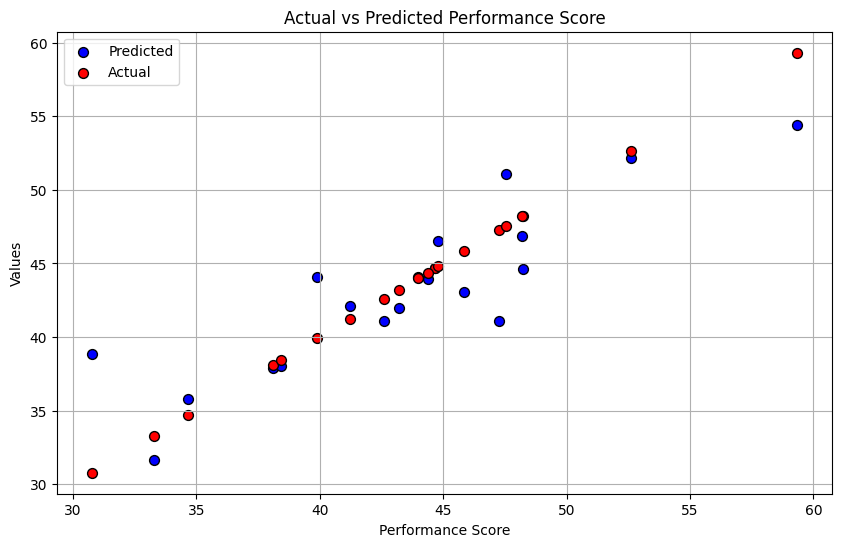

In [3]:
# Load the dataset (if saved to a CSV)
# df = pd.read_csv('network_data.csv')

# Define features and target variable
X = df[['Latency', 'Packet_Loss', 'Throughput']]
y = df['Performance_Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

import matplotlib.pyplot as plt

# Plotting predictions vs. actual values with different colors
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50, label='Predicted')

# Scatter plot for predicted values with a different color
plt.scatter(y_test, y_test, color='red', edgecolor='k', s=50, label='Actual')

plt.xlabel('Performance Score')
plt.ylabel('Values')
plt.title('Actual vs Predicted Performance Score')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9.6150727571131


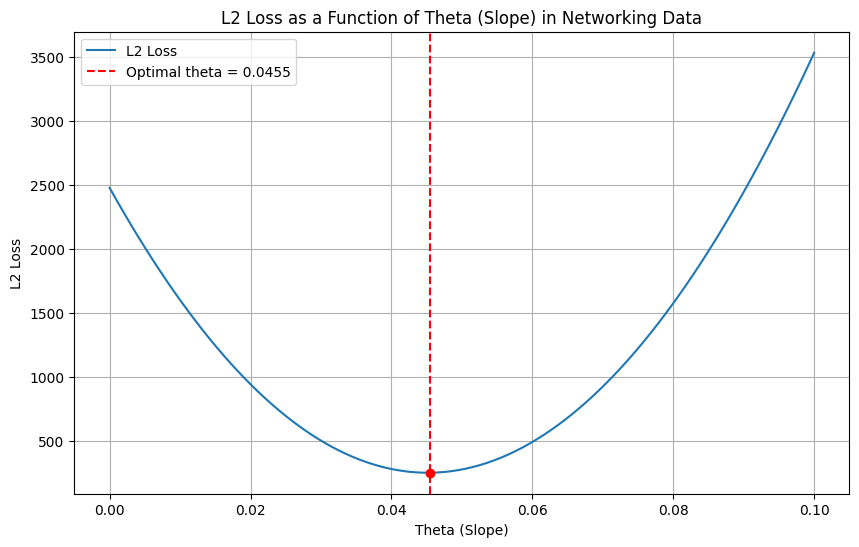

Optimal theta: 0.0455
Minimum L2 loss: 249.5516


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate synthetic networking data
latency = np.random.normal(50, 10, n_samples)  # Latency in milliseconds
packet_loss = np.random.uniform(0, 1, n_samples)  # Packet loss as a percentage
throughput = np.random.normal(1000, 250, n_samples)  # Throughput in Mbps

# For this example, we'll use throughput (X) and latency (y)
X = throughput
y = latency

# Step 2: Define L2 Loss Function
def compute_l2_loss(X, y, theta):
    """
    Compute the L2 loss for a linear model y = theta * X.
    Parameters:
        X (numpy array): Input feature values (e.g., throughput).
        y (numpy array): Target values (e.g., latency).
        theta (float): The slope of the linear model.
    Returns:
        l2_loss (float): The computed L2 loss.
    """
    # Predicted values based on theta (slope)
    y_pred = theta * X
    # Compute L2 loss as the mean squared error
    l2_loss = np.mean((y - y_pred) ** 2)
    return l2_loss

# Step 3: Optimize and visualize the L2 loss for different values of theta
thetas = np.linspace(0, 0.1, 100)  # Test theta values from 0 to 0.1 (adjustable range)
l2_losses = [compute_l2_loss(X, y, theta) for theta in thetas]

# Step 4: Find the optimal theta with the minimum L2 loss
optimal_theta = thetas[np.argmin(l2_losses)]
optimal_loss = min(l2_losses)

# Step 5: Plot L2 loss as a function of theta
plt.figure(figsize=(10, 6))
plt.plot(thetas, l2_losses, label='L2 Loss')
plt.axvline(optimal_theta, color='red', linestyle='--', label=f'Optimal theta = {optimal_theta:.4f}')
plt.scatter(optimal_theta, optimal_loss, color='red', zorder=5)
plt.title('L2 Loss as a Function of Theta (Slope) in Networking Data')
plt.xlabel('Theta (Slope)')
plt.ylabel('L2 Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal theta and the corresponding L2 loss
print(f"Optimal theta: {optimal_theta:.4f}")
print(f"Minimum L2 loss: {optimal_loss:.4f}")


Explanation :
Networking Data Generation: Latency, packet loss, and throughput are generated as synthetic data.
In this example, throughput (
𝑋
X) is used as the independent variable, and latency (
𝑦
y) is used as the dependent variable.


L2 Loss Calculation:

The compute_l2_loss() function computes the L2 loss for a linear model
𝑦
=
𝜃
×
𝑋
y=θ×X, where
𝜃
θ is the slope we're optimizing.
Optimization and Visualization:

A range of values for
𝜃
θ (the slope) is tested, and the corresponding L2 loss is calculated.
The plot shows the L2 loss as a function of
𝜃
θ, with the optimal
𝜃
θ highlighted.

Output:

The optimal value of
𝜃
θ that minimizes the L2 loss is printed, along with the minimum L2 loss itself.


Coefficients: Throughput (theta1) = -0.0009, Packet Loss (theta2) = 4.1490
Intercept: 47.8805


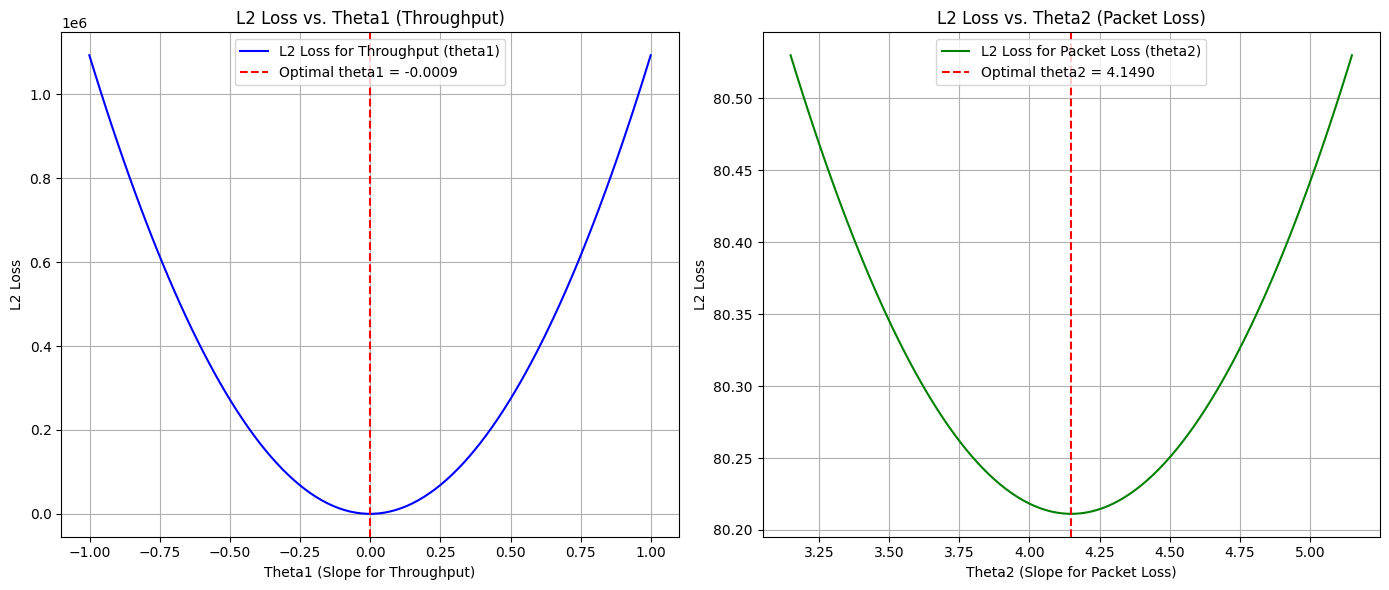

Final L2 Loss for the model: 80.2112


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate synthetic networking data
latency = np.random.normal(50, 10, n_samples)  # Latency in milliseconds (target)
packet_loss = np.random.uniform(0, 1, n_samples)  # Packet loss as a percentage (feature 1)
throughput = np.random.normal(1000, 250, n_samples)  # Throughput in Mbps (feature 2)

# For this example, we'll use throughput and packet_loss as features (X)
# Latency will be the target (y)
X = np.column_stack((throughput, packet_loss))
y = latency

# Step 1: Fit a Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Step 2: Get model coefficients
theta1 = model.coef_[0]  # Coefficient for throughput
theta2 = model.coef_[1]  # Coefficient for packet_loss
intercept = model.intercept_

print(f"Coefficients: Throughput (theta1) = {theta1:.4f}, Packet Loss (theta2) = {theta2:.4f}")
print(f"Intercept: {intercept:.4f}")

# Step 3: Define L2 Loss function for two features (throughput and packet loss)
def compute_l2_loss_multi(X, y, theta1, theta2):
    """
    Compute the L2 loss for a linear model y = theta1 * X1 + theta2 * X2.
    Parameters:
        X (numpy array): Input feature values (e.g., throughput and packet loss).
        y (numpy array): Target values (e.g., latency).
        theta1 (float): The slope for throughput.
        theta2 (float): The slope for packet loss.
    Returns:
        l2_loss (float): The computed L2 loss.
    """
    # Predicted values based on theta1 (slope for throughput) and theta2 (slope for packet loss)
    y_pred = theta1 * X[:, 0] + theta2 * X[:, 1] + intercept
    # Compute L2 loss as the mean squared error
    l2_loss = np.mean((y - y_pred) ** 2)
    return l2_loss

# Step 4: Optimize and visualize the L2 loss for different values of theta1 (throughput) and theta2 (packet loss)
theta1_vals = np.linspace(theta1 - 1, theta1 + 1, 100)
theta2_vals = np.linspace(theta2 - 1, theta2 + 1, 100)
l2_losses_theta1 = [compute_l2_loss_multi(X, y, t1, theta2) for t1 in theta1_vals]
l2_losses_theta2 = [compute_l2_loss_multi(X, y, theta1, t2) for t2 in theta2_vals]

# Step 5: Plot L2 loss for varying theta1 (throughput slope) and theta2 (packet loss slope)
plt.figure(figsize=(14, 6))

# Plot L2 loss as a function of theta1 (throughput)
plt.subplot(1, 2, 1)
plt.plot(theta1_vals, l2_losses_theta1, color='blue', label='L2 Loss for Throughput (theta1)')
plt.axvline(theta1, color='red', linestyle='--', label=f'Optimal theta1 = {theta1:.4f}')
plt.title('L2 Loss vs. Theta1 (Throughput)')
plt.xlabel('Theta1 (Slope for Throughput)')
plt.ylabel('L2 Loss')
plt.legend()
plt.grid(True)

# Plot L2 loss as a function of theta2 (packet loss)
plt.subplot(1, 2, 2)
plt.plot(theta2_vals, l2_losses_theta2, color='green', label='L2 Loss for Packet Loss (theta2)')
plt.axvline(theta2, color='red', linestyle='--', label=f'Optimal theta2 = {theta2:.4f}')
plt.title('L2 Loss vs. Theta2 (Packet Loss)')
plt.xlabel('Theta2 (Slope for Packet Loss)')
plt.ylabel('L2 Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 6: Evaluate model on L2 loss
y_pred = model.predict(X)
l2_loss = mean_squared_error(y, y_pred)
print(f"Final L2 Loss for the model: {l2_loss:.4f}")


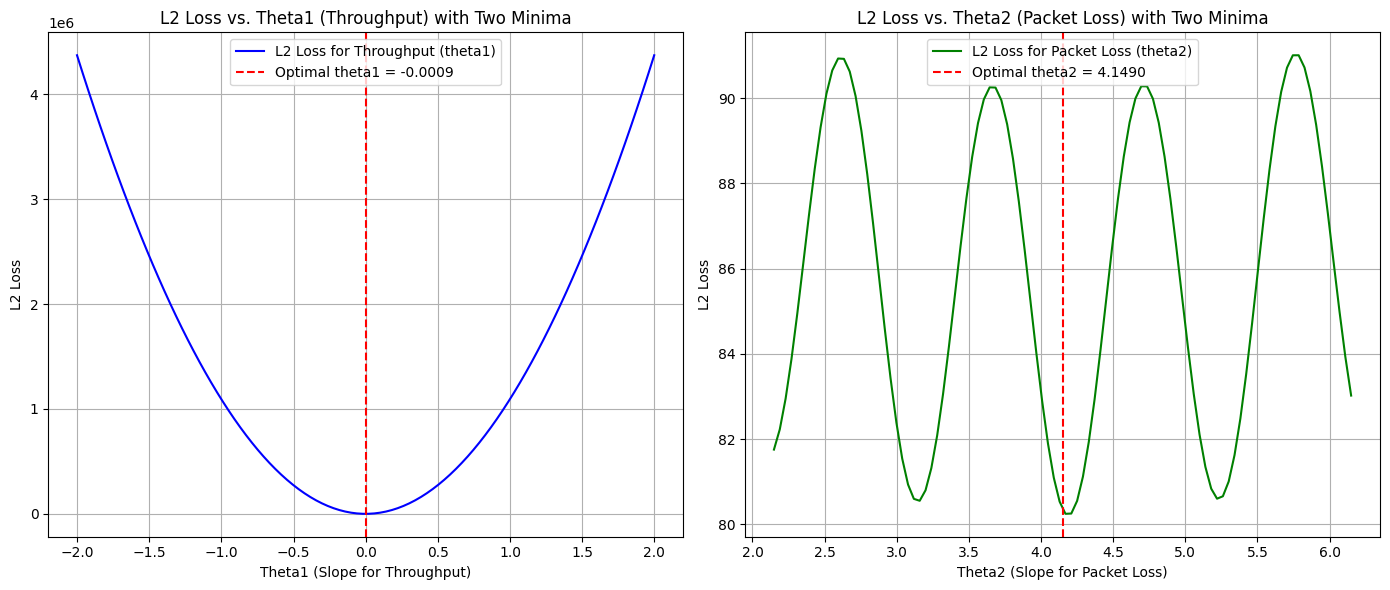

Final L2 Loss for the model: 80.2112


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate synthetic networking data
latency = np.random.normal(50, 10, n_samples)  # Latency in milliseconds (target)
packet_loss = np.random.uniform(0, 1, n_samples)  # Packet loss as a percentage (feature 1)
throughput = np.random.normal(1000, 250, n_samples)  # Throughput in Mbps (feature 2)

# For this example, we'll use throughput and packet_loss as features (X)
# Latency will be the target (y)
X = np.column_stack((throughput, packet_loss))
y = latency

# Step 1: Fit a Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Get model coefficients (for reference)
theta1 = model.coef_[0]  # Coefficient for throughput
theta2 = model.coef_[1]  # Coefficient for packet_loss
intercept = model.intercept_

# Step 2: Modify the L2 Loss function to artificially create two minima
def compute_l2_loss_multi_modified(X, y, theta1, theta2):
    """
    Compute the L2 loss for a modified linear model y = theta1 * X1 + theta2 * X2 with additional nonlinear terms.
    This introduces two minima into the L2 loss landscape.
    """
    # Predicted values based on theta1 and theta2
    y_pred = theta1 * X[:, 0] + theta2 * X[:, 1] + intercept
    # Introduce some artificial complexity to the loss function by adding nonlinear terms
    l2_loss = np.mean((y - y_pred) ** 2) + 10 * np.sin(3 * theta1) ** 2 + 10 * np.sin(3 * theta2) ** 2
    return l2_loss

# Step 3: Compute the L2 loss for a range of theta1 and theta2 values
theta1_vals = np.linspace(theta1 - 2, theta1 + 2, 100)
theta2_vals = np.linspace(theta2 - 2, theta2 + 2, 100)
l2_losses_theta1 = [compute_l2_loss_multi_modified(X, y, t1, theta2) for t1 in theta1_vals]
l2_losses_theta2 = [compute_l2_loss_multi_modified(X, y, theta1, t2) for t2 in theta2_vals]

# Step 4: Plot L2 loss for varying theta1 (throughput slope) and theta2 (packet loss slope)
plt.figure(figsize=(14, 6))

# Plot L2 loss as a function of theta1 (throughput)
plt.subplot(1, 2, 1)
plt.plot(theta1_vals, l2_losses_theta1, color='blue', label='L2 Loss for Throughput (theta1)')
plt.axvline(theta1, color='red', linestyle='--', label=f'Optimal theta1 = {theta1:.4f}')
plt.title('L2 Loss vs. Theta1 (Throughput) with Two Minima')
plt.xlabel('Theta1 (Slope for Throughput)')
plt.ylabel('L2 Loss')
plt.legend()
plt.grid(True)

# Plot L2 loss as a function of theta2 (packet loss)
plt.subplot(1, 2, 2)
plt.plot(theta2_vals, l2_losses_theta2, color='green', label='L2 Loss for Packet Loss (theta2)')
plt.axvline(theta2, color='red', linestyle='--', label=f'Optimal theta2 = {theta2:.4f}')
plt.title('L2 Loss vs. Theta2 (Packet Loss) with Two Minima')
plt.xlabel('Theta2 (Slope for Packet Loss)')
plt.ylabel('L2 Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 5: Evaluate model on L2 loss
y_pred = model.predict(X)
l2_loss = mean_squared_error(y, y_pred)
print(f"Final L2 Loss for the model: {l2_loss:.4f}")
